<a href="https://colab.research.google.com/github/abeashvil/MLTitanicPrediction/blob/main/Titanic_Prediction_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
#print(tf.version)

t = tf.zeros([5,5,5,5])
#print(t)
t = tf.reshape(t, [125, -1])
#print(t)

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [19]:
#Load Dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
#print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
#print(dftrain.head())
#print(dftrain.loc[0], y_train[0])
#dftrain.describe() describes things in the data set

<Axes: >

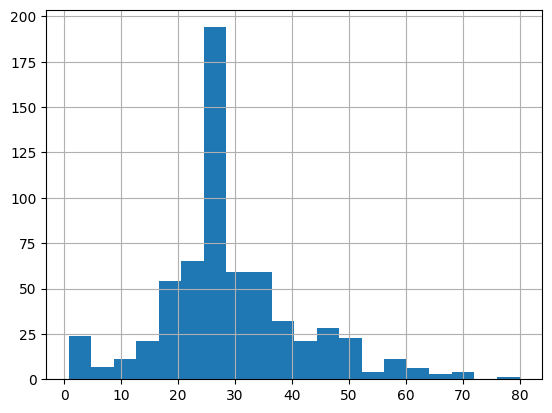

In [20]:
dftrain.age.hist(bins = 20)

<Axes: >

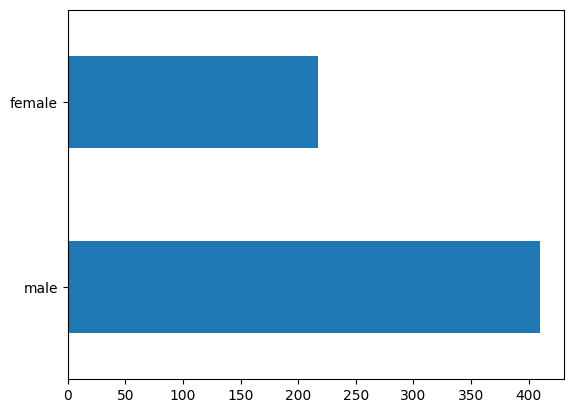

In [21]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

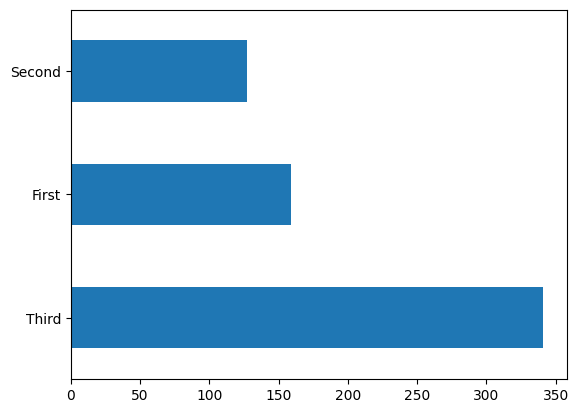

In [22]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% Survive')

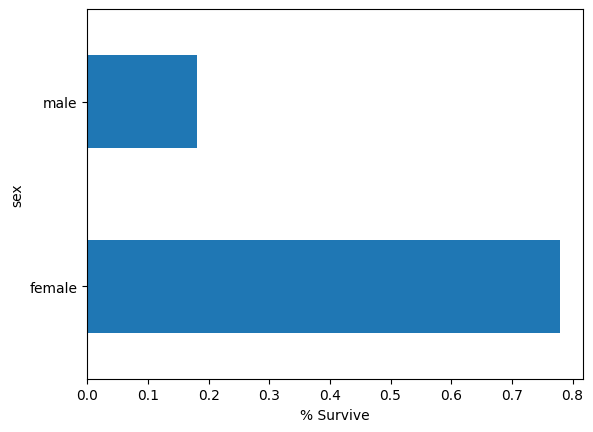

In [23]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel("% Survive")

In [25]:
###CREATING THE FEATURE COLUMNS. NEEDED FOR LINEAR REGRESSION
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERICAL_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [29]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

0.7651515
{'accuracy': 0.7651515, 'accuracy_baseline': 0.625, 'auc': 0.8329048, 'auc_precision_recall': 0.76607585, 'average_loss': 0.52027154, 'label/mean': 0.375, 'loss': 0.51214564, 'precision': 0.7846154, 'prediction/mean': 0.26935798, 'recall': 0.5151515, 'global_step': 200}


In [41]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])

sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.12801552


# END OF LINEAR REGRESSION